In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('customers.csv')
print("Dataset:")
print(df.head())
print(f"\nShape: {df.shape}")

Dataset:
   Age  Income  Segment
0   25   30000        0
1   28   35000        0
2   22   28000        0
3   26   32000        0
4   24   31000        0

Shape: (20, 3)


In [3]:
print(f"\nMissing values:\n{df.isnull().sum()}")


Missing values:
Age        0
Income     0
Segment    0
dtype: int64


In [4]:
X = df[['Age', 'Income']].values
print(f"\nFeatures shape: {X.shape}")


Features shape: (20, 2)


In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

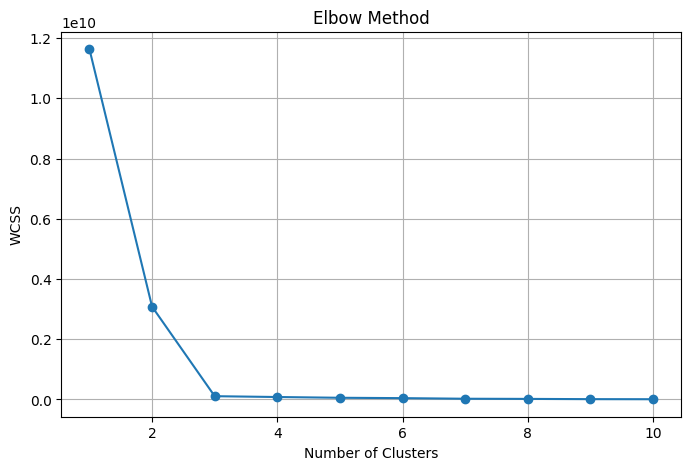

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

print(f"\nCluster labels: {y_kmeans}")


Cluster labels: [2 2 2 2 2 0 0 0 0 0 1 1 1 1 1 2 0 1 2 0]


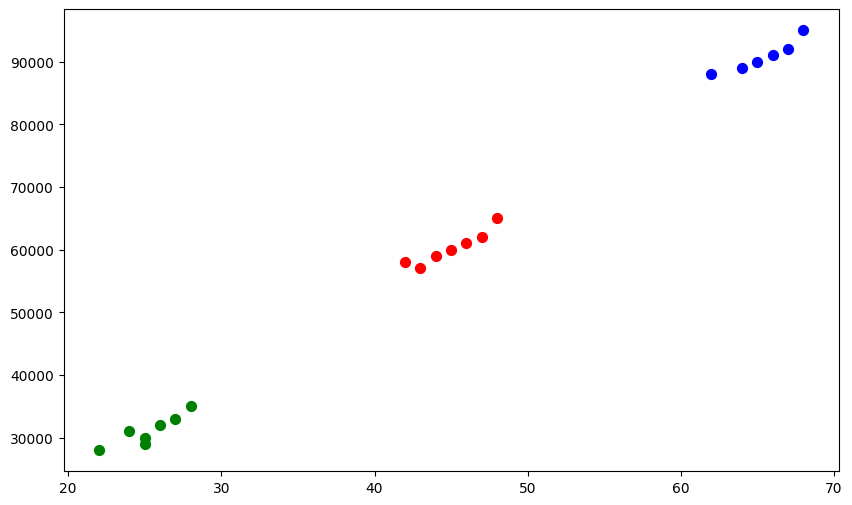

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=50, c='red', label='Cluster 0')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=50, c='blue', label='Cluster 1')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=50, c='green', label='Cluster 2')

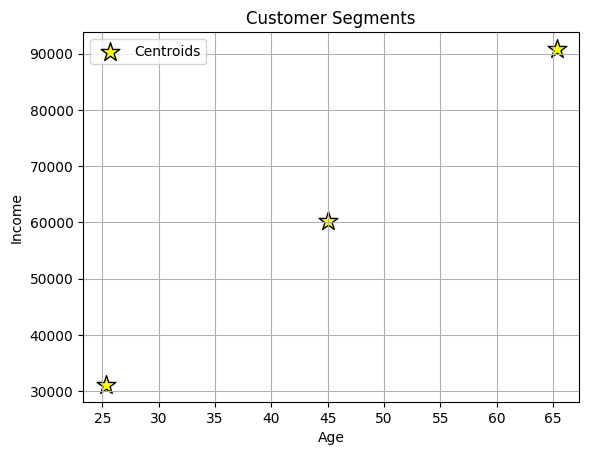

In [9]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='yellow', marker='*', edgecolor='black', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
print("\nCluster Centers:")
print(kmeans.cluster_centers_)


Cluster Centers:
[[4.50000000e+01 6.02857143e+04]
 [6.53333333e+01 9.08333333e+04]
 [2.52857143e+01 3.11428571e+04]]
